Imports und Weissemodell

In [3]:
import modelbase
import modelbase.ratelaws as rl
from weisse import WeisseBaseModel, defaultParameters

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo

In [4]:
cl = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq']


In [6]:
m = WeisseBaseModel()
s = modelbase.Simulator(m)
#                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])
s.timeCourse(np.linspace(0,3000,100),weise_values);
    

#### plotten von lambda

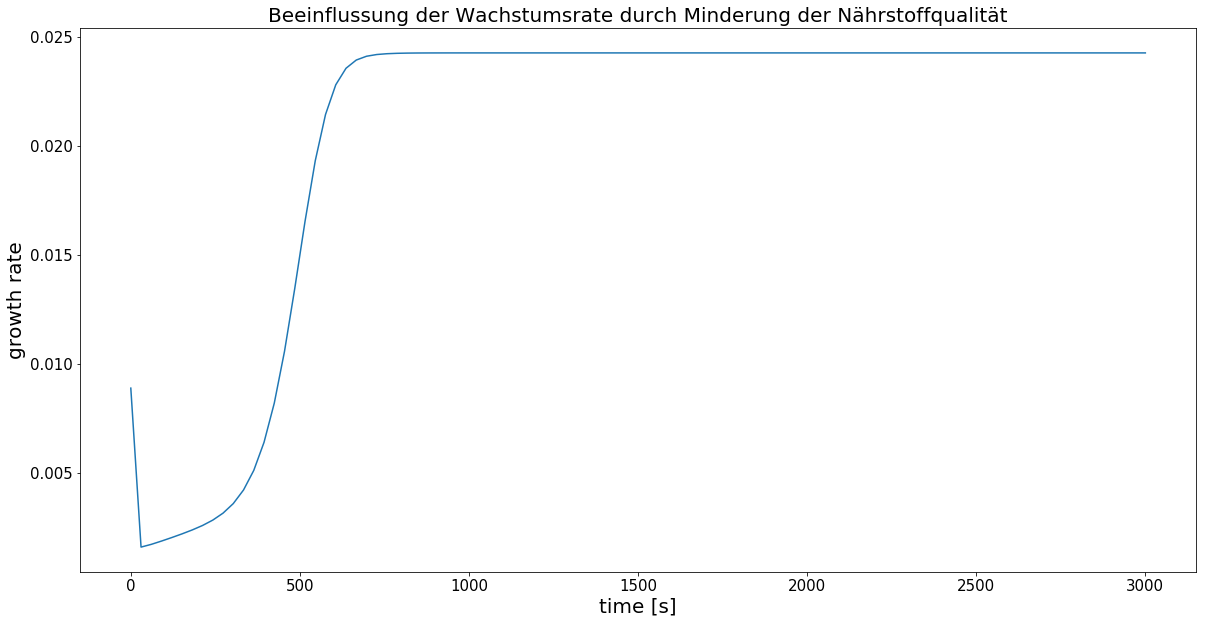

In [7]:
# Plotten Sie die zeitliche Entwicklung
plt.figure(figsize=(20,10))
plt.title('Beeinflussung der Wachstumsrate durch Minderung der Nährstoffqualität', size = 20)
plt.xlabel('time [s]', size = 20)
plt.ylabel('growth rate', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

#for i, data in enumerate(s.getT()):
plt.plot(s.getT(),s.getY()[:,16], label = 'pr') #valuesOneHundredTimeSteps[i][:,10]
#plt.legend(loc = 'lower right',prop = {'size': 20})

Optimierungfunktion zur Maximierung von Lambda

In [7]:
def Opt(p0):
    
    m = WeisseBaseModel()
    s = modelbase.Simulator(m)
    m.par.Kgamma, m.par.wr, m.par.wt, m.par.wm, m.par.wq, m.par.thetar, m.par.thetat, m.par.thetam, m.par.thetaq, m.par.Kq = p0
    
    #                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
    weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])
    s.timeCourse(np.linspace(0,3000,100),weise_values);
    lambdanach = s.getY()[:,16][-1]
    lamda = 100 - lambdanach
    print(lamda)
    
    return (lamda)
 


In [8]:
init_guess = [7,930,4.14,4.14,948.93,
              426.87,4.38,4.38,4.38,152219]

bounds = ((0.1,100),(0.1,1000),(0.1,100),
          (0.1,100),(1,10000),(0.1,1000),(0.1,100),(0.1,100),
          (0.1,100),(0.1,1000000))

In [ ]:
fit = spo.minimize(Opt, init_guess, bounds = bounds)


99.97573718721809
99.9757371872234
99.97573718721814
99.97573718718165
99.97573718722182
99.97573718721821
99.97573718721799
99.97573718722809
99.97573718721706
99.97573718721058
99.9757371872181
99.97572191730579
99.97572191731109
99.97572191730583
99.97572191726937
99.97572191730951
99.9757219173059
99.97572191730568
99.97572191731578
99.97572191730475
99.97572191729827
99.97572191730579
99.94506707555036
99.94506707555585
99.94506707555037
99.94506707554189
99.94506707555264
99.9450670755505
99.94506707555033
99.94506707555333
99.94506707555021
99.94506707554804
99.94506707555036
99.94348482492153
99.94348482492754
99.94348482492154
99.94348482492417
99.94348482483063
99.94348482492168
99.9434848249215
99.9434848249203
99.94348482492535
99.94348482491918
99.94348482492153
99.94197375995158
99.9419737599571
99.94197375995158
99.94197375994423
99.94197375995371
99.94197375995172
99.94197375995157
99.94197375995418
99.94197375995148
99.94197375994952
99.94197375995158
99.94111763005326

In [ ]:
fit
'''
fun: 99.91573044418507
 hess_inv: <10x10 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.90663974, 10.88378951,  0.93006349, 37.0969758 , 17.08320525,
       16.76341412, 14.07120322,  9.83570629,  5.30049533, 13.20164387])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 649
      nit: 11
   status: 0
  success: True
        x: array([1.42428127e+00, 9.47040983e+02, 8.80589914e+01, 1.25775658e+01,
       9.72881917e+02, 4.51503384e+02, 1.00000062e-01, 3.30160696e+01,
       3.36325301e+01, 1.52238572e+05])
'''

überschreiben der Parameter in Fit-werte

In [8]:
mneu = WeisseBaseModel()

#                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
weise_values_neu = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])
    
mneu.par.update({'Kgamma': 1.42428127e+00})
mneu.par.update({'wr':9.47040983e+02})
mneu.par.update({'wt':8.80589914e+01})
mneu.par.update({'wm':1.25775658e+01})
mneu.par.update({'wq':9.72881917e+02})
mneu.par.update({'thetar':4.51503384e+02})
mneu.par.update({'thetat':1.00000062e-01})
mneu.par.update({'thetam':3.30160696e+01})
mneu.par.update({'thetaq':3.36325301e+01})
mneu.par.update({'Kq':1.52238572e+05})

sneu = modelbase.Simulator(mneu)
sneu.timeCourse(np.linspace(0,3000,100),weise_values_neu);


Plotten des Wachtums vor und nach dem Fit

Text(0, 0.5, 'concentration [a.u.]')

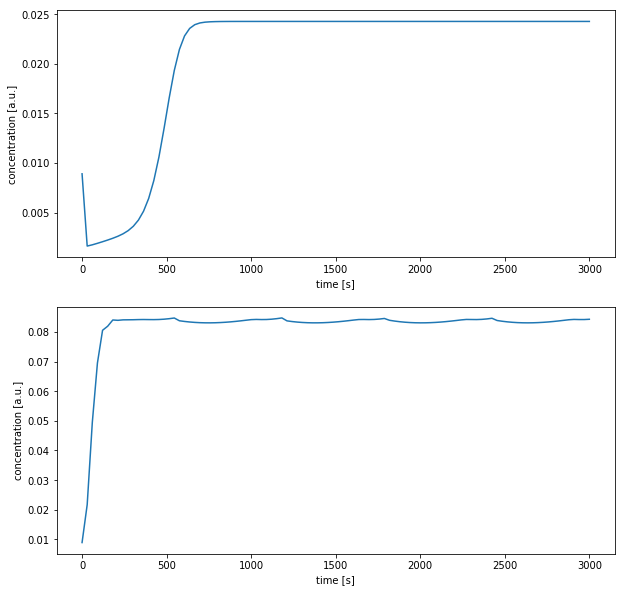

In [9]:
fig, Plotlist = plt.subplots(2,1,figsize=(10,10))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(s.getT(),s.getY()[:,16])
#Plotlist[0].plot(sneu.getT(),sneu.getVarsByName(cl[1:2]),label = cl[1])
#Plotlist[0].set_title('Beeinflussung der Wachstumsrate durch Minderung der Nährstoffqualität', size = 20)
Plotlist[0].set_xlabel('time [s]')
Plotlist[0].set_ylabel('concentration [a.u.]')


#Plotlist[0].plot(s.getT(),s.getRate('vr'))
Plotlist[1].plot(sneu.getT(),sneu.getY()[:,16])
#Plotlist[1].set_title('Beeinflussung der Wachstumsrate durch Minderung der Nährstoffqualität', size = 20)
Plotlist[1].set_xlabel('time [s]')
Plotlist[1].set_ylabel('concentration [a.u.]')

model ohne fit 

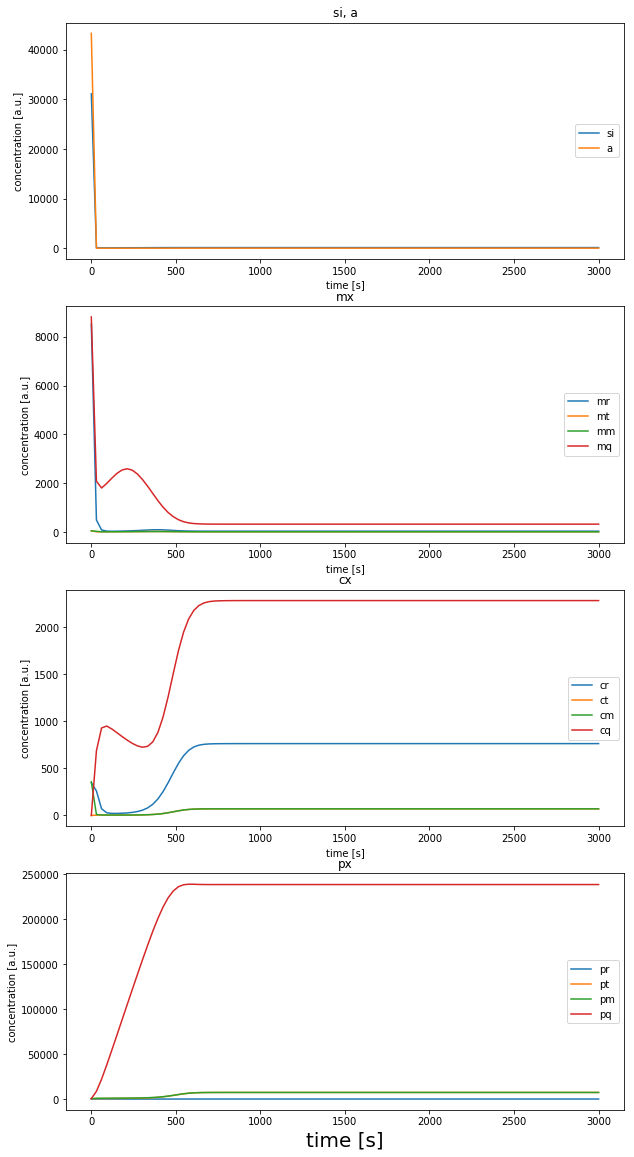

In [10]:
fig, Plotlist = plt.subplots(4,1,figsize=(10,20))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(s.getT(),s.getVarsByName(cl[0:1]),label = cl[0])
Plotlist[0].plot(s.getT(),s.getVarsByName(cl[1:2]),label = cl[1])
Plotlist[0].set_title('si, a')
Plotlist[0].set_xlabel('time [s]')
Plotlist[0].set_ylabel('concentration [a.u.]')
Plotlist[0].legend(loc = 'center right')


Plotlist[1].plot(s.getT(),s.getVarsByName(cl[2:3]),label = cl[2])
Plotlist[1].plot(s.getT(),s.getVarsByName(cl[3:4]),label = cl[3])
Plotlist[1].plot(s.getT(),s.getVarsByName(cl[4:5]),label = cl[4])
Plotlist[1].plot(s.getT(),s.getVarsByName(cl[5:6]),label = cl[5])
Plotlist[1].set_title('mx')
Plotlist[1].set_xlabel('time [s]')
Plotlist[1].set_ylabel('concentration [a.u.]')
Plotlist[1].legend(loc = 'center right')


Plotlist[2].plot(s.getT(),s.getVarsByName(cl[6:7]),label = cl[6])
Plotlist[2].plot(s.getT(),s.getVarsByName(cl[7:8]),label = cl[7])
Plotlist[2].plot(s.getT(),s.getVarsByName(cl[8:9]),label = cl[8])
Plotlist[2].plot(s.getT(),s.getVarsByName(cl[9:10]),label = cl[9])
Plotlist[2].set_title('cx')
Plotlist[2].set_xlabel('time [s]')
Plotlist[2].set_ylabel('concentration [a.u.]')
Plotlist[2].legend(loc = 'center right')


Plotlist[3].plot(s.getT(),s.getVarsByName(cl[10:11]), label = cl[10])
Plotlist[3].plot(s.getT(),s.getVarsByName(cl[11:12]),label = cl[11])
Plotlist[3].plot(s.getT(),s.getVarsByName(cl[12:13]),label = cl[12])
Plotlist[3].plot(s.getT(),s.getVarsByName(cl[13:14]),label = cl[13])
Plotlist[3].set_title('px')
Plotlist[3].set_xlabel('time [s]', size = 20)
Plotlist[3].set_ylabel('concentration [a.u.]')
Plotlist[3].legend(loc = 'center right')



Model mit Fit

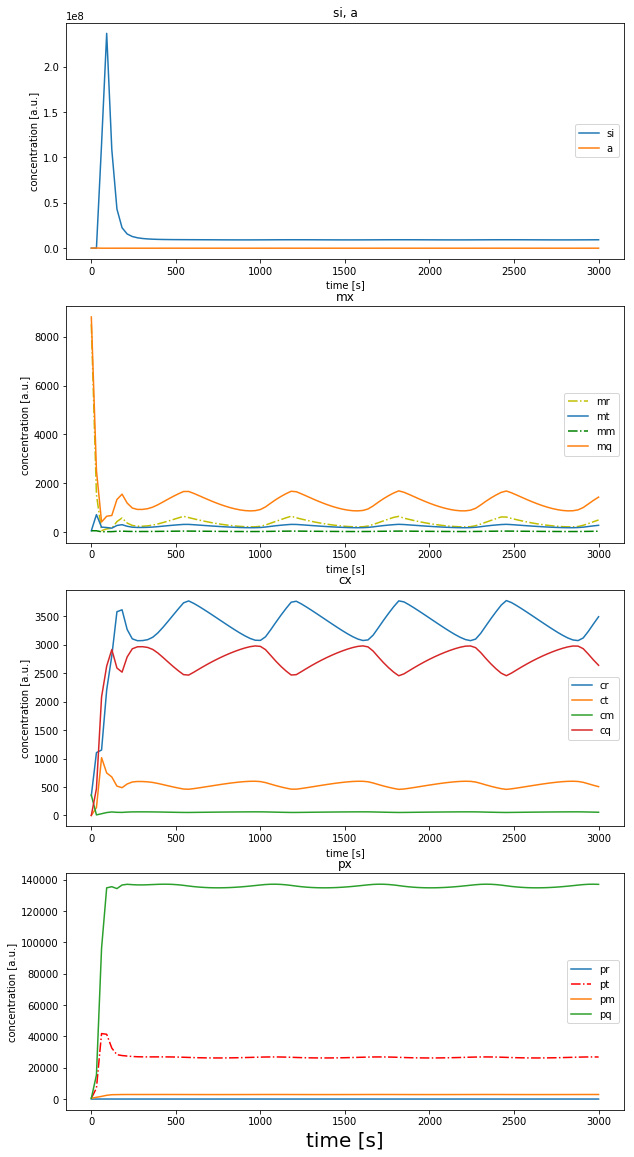

In [12]:
fig, Plotlist = plt.subplots(4,1,figsize=(10,20))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(sneu.getT(),sneu.getVarsByName(cl[0:1]),label = cl[0])
Plotlist[0].plot(sneu.getT(),sneu.getVarsByName(cl[1:2]),label = cl[1])
Plotlist[0].set_title('si, a')
Plotlist[0].set_xlabel('time [s]')
Plotlist[0].set_ylabel('concentration [a.u.]')
Plotlist[0].legend(loc = 'center right')


Plotlist[1].plot(sneu.getT(),sneu.getVarsByName(cl[2:3]),'y-.',label = cl[2])
Plotlist[1].plot(sneu.getT(),sneu.getVarsByName(cl[3:4]),label = cl[3])
Plotlist[1].plot(sneu.getT(),sneu.getVarsByName(cl[4:5]),'g-.',label = cl[4])
Plotlist[1].plot(sneu.getT(),sneu.getVarsByName(cl[5:6]),label = cl[5])
Plotlist[1].set_title('mx')
Plotlist[1].set_xlabel('time [s]')
Plotlist[1].set_ylabel('concentration [a.u.]')
#Plotlist[1].set_xlim(25,50)
#Plotlist[1].set_ylim(0,0.5)
Plotlist[1].legend(loc = 'center right')


Plotlist[2].plot(sneu.getT(),sneu.getVarsByName(cl[6:7]),label = cl[6])
Plotlist[2].plot(sneu.getT(),sneu.getVarsByName(cl[7:8]),label = cl[7])
Plotlist[2].plot(sneu.getT(),sneu.getVarsByName(cl[8:9]),label = cl[8])
Plotlist[2].plot(sneu.getT(),sneu.getVarsByName(cl[9:10]),label = cl[9])
Plotlist[2].set_title('cx')
Plotlist[2].set_xlabel('time [s]')
Plotlist[2].set_ylabel('concentration [a.u.]')
Plotlist[2].legend(loc = 'center right')


Plotlist[3].plot(sneu.getT(),sneu.getVarsByName(cl[10:11]), label = cl[10])
Plotlist[3].plot(sneu.getT(),sneu.getVarsByName(cl[11:12]),'r-.',label = cl[11])
Plotlist[3].plot(sneu.getT(),sneu.getVarsByName(cl[12:13]),label = cl[12])
Plotlist[3].plot(sneu.getT(),sneu.getVarsByName(cl[13:14]),label = cl[13])
Plotlist[3].set_title('px')
Plotlist[3].set_xlabel('time [s]', size = 20)
Plotlist[3].set_ylabel('concentration [a.u.]')
Plotlist[3].legend(loc = 'center right')

Vergleich von vr

(0, 1000)

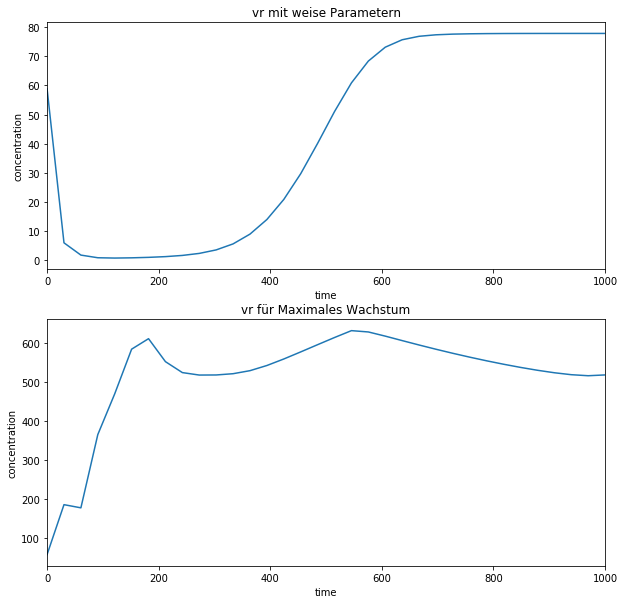

In [13]:
fig, Plotlist = plt.subplots(2,1,figsize=(10,10))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(s.getT(),s.getRate('vr'))
Plotlist[0].set_title('vr mit weise Parametern')
Plotlist[0].set_xlabel('time')
Plotlist[0].set_ylabel('concentration')
#Plotlist[0].set_ylim(60,140)
Plotlist[0].set_xlim(0,1000)


Plotlist[1].plot(sneu.getT(),sneu.getRate('vr'))
Plotlist[1].set_title('vr für Maximales Wachstum') 
Plotlist[1].set_xlabel('time')
Plotlist[1].set_ylabel('concentration')
#Plotlist[0].set_ylim(60,140)
Plotlist[1].set_xlim(0,1000)

Vergleich von vt

(0, 1000)

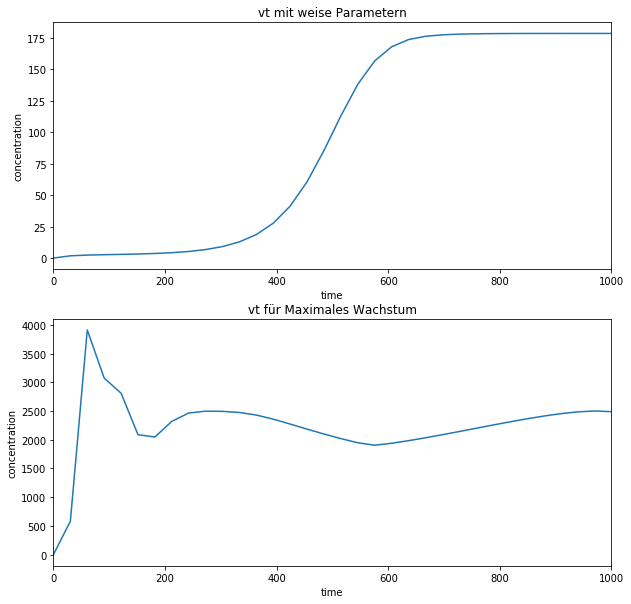

In [14]:
fig, Plotlist = plt.subplots(2,1,figsize=(10,10))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(s.getT(),s.getRate('vt'))
Plotlist[0].set_title('vt mit weise Parametern')
Plotlist[0].set_xlabel('time')
Plotlist[0].set_ylabel('concentration')
#Plotlist[0].set_ylim(60,140)
Plotlist[0].set_xlim(0,1000)


Plotlist[1].plot(sneu.getT(),sneu.getRate('vt'))
Plotlist[1].set_title('vt für Maximales Wachstum') 
Plotlist[1].set_xlabel('time')
Plotlist[1].set_ylabel('concentration')
#Plotlist[0].set_ylim(60,140)
Plotlist[1].set_xlim(0,1000)

Vergleich von vm

(0, 1000)

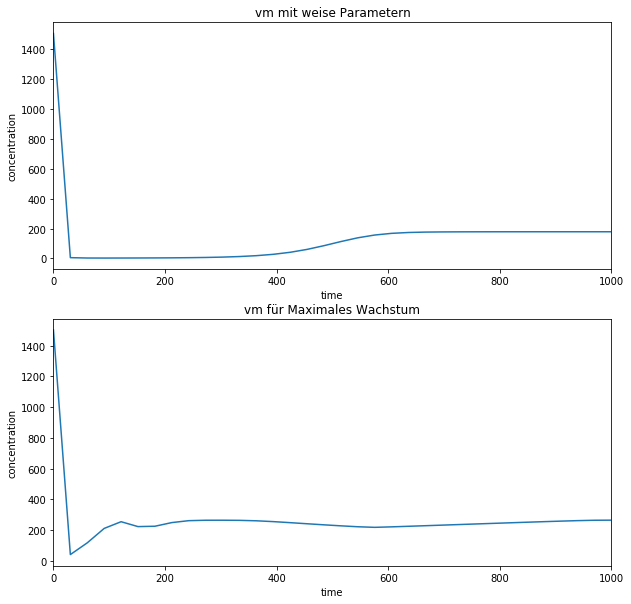

In [15]:
fig, Plotlist = plt.subplots(2,1,figsize=(10,10))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(s.getT(),s.getRate('vm'))
Plotlist[0].set_title('vm mit weise Parametern')
Plotlist[0].set_xlabel('time')
Plotlist[0].set_ylabel('concentration')
#Plotlist[0].set_ylim(60,140)
Plotlist[0].set_xlim(0,1000)


Plotlist[1].plot(sneu.getT(),sneu.getRate('vm'))
Plotlist[1].set_title('vm für Maximales Wachstum') 
Plotlist[1].set_xlabel('time')
Plotlist[1].set_ylabel('concentration')
#Plotlist[1].set_ylim(60,140)
Plotlist[1].set_xlim(0,1000)

Vergleich von vq

(0, 1000)

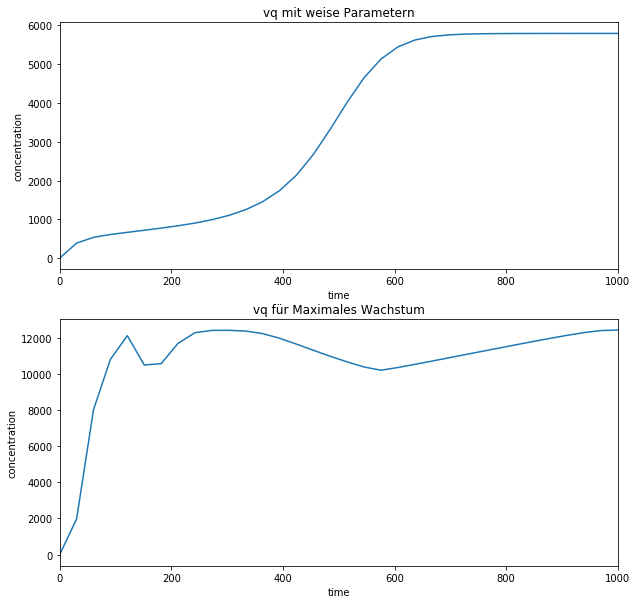

In [16]:
fig, Plotlist = plt.subplots(2,1,figsize=(10,10))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(s.getT(),s.getRate('vq'))
Plotlist[0].set_title('vq mit weise Parametern')
Plotlist[0].set_xlabel('time')
Plotlist[0].set_ylabel('concentration')
#Plotlist[0].set_ylim(60,140)
Plotlist[0].set_xlim(0,1000)


Plotlist[1].plot(sneu.getT(),sneu.getRate('vq'))
Plotlist[1].set_title('vq für Maximales Wachstum') 
Plotlist[1].set_xlabel('time')
Plotlist[1].set_ylabel('concentration')
#Plotlist[1].set_ylim(60,140)
Plotlist[1].set_xlim(0,1000)


Vergleich von vimp

(0, 1000)

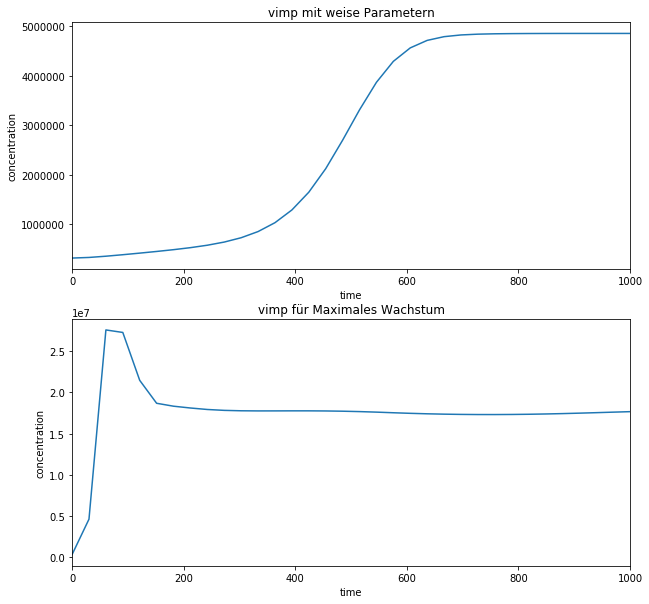

In [17]:
fig, Plotlist = plt.subplots(2,1,figsize=(10,10))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(s.getT(),s.getRate('vimp'))
Plotlist[0].set_title('vimp mit weise Parametern')
Plotlist[0].set_xlabel('time')
Plotlist[0].set_ylabel('concentration')
#Plotlist[0].set_ylim(60,140)
Plotlist[0].set_xlim(0,1000)


Plotlist[1].plot(sneu.getT(),sneu.getRate('vimp'))
Plotlist[1].set_title('vimp für Maximales Wachstum') 
Plotlist[1].set_xlabel('time')
Plotlist[1].set_ylabel('concentration')
#Plotlist[1].set_ylim(60,140)
Plotlist[1].set_xlim(0,1000)


Vergleich von vcat

(0, 1000)

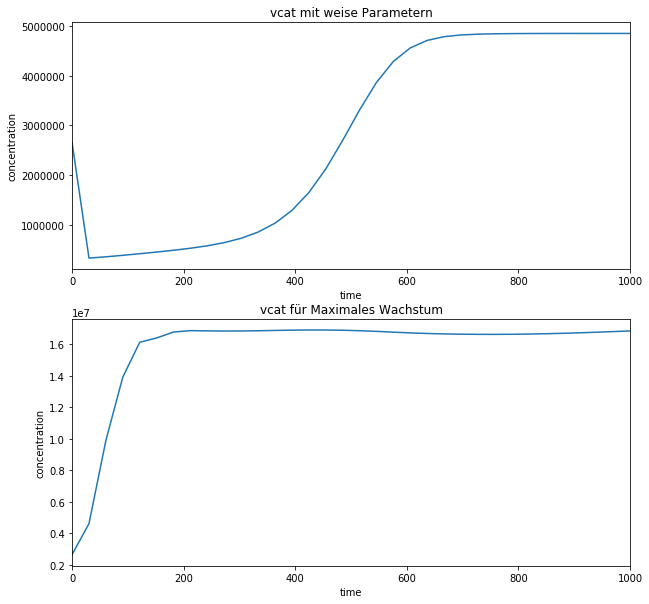

In [18]:
fig, Plotlist = plt.subplots(2,1,figsize=(10,10))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(s.getT(),s.getRate('vcat'))
Plotlist[0].set_title('vcat mit weise Parametern')
Plotlist[0].set_xlabel('time')
Plotlist[0].set_ylabel('concentration')
#Plotlist[0].set_ylim(60,140)
Plotlist[0].set_xlim(0,1000)


Plotlist[1].plot(sneu.getT(),sneu.getRate('vcat'))
Plotlist[1].set_title('vcat für Maximales Wachstum') 
Plotlist[1].set_xlabel('time')
Plotlist[1].set_ylabel('concentration')
#Plotlist[1].set_ylim(60,140)
Plotlist[1].set_xlim(0,1000)


In [84]:
mneu.stoichiometries

2.0